<a href="https://colab.research.google.com/github/ChastityB/Food_Sales_Predictions/blob/main/Food_Sales_Predictions_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
filename = "/content/drive/MyDrive/Coding Dojo/01 Python Fundamentals/03 Week 3: Exploratory Viz/Assignments Exercise/sales_predictions.csv"
df_sales = pd.read_csv(filename)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [70]:
#display number of rows and columns
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [71]:
#Let's get the number of rows and columns specifically
df_sales.shape
#8523 rows and 12 columns

(8523, 12)

In [72]:
#Let's check what are the datatypes of each variable
df_sales.dtypes
#object = strings or mixed numberic+string value
#float64 = floating numbers

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [73]:
#Let's check for duplicates
display(df_sales[df_sales.duplicated(keep=False)])
df_sales.duplicated().any()

#We have no duplicate values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


False

In [74]:
#Let's find missing values
df_sales.isna().sum()
#looks like Item_Weight and Outlet_Size have 1463 and 2410 missing values respectively

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [75]:
#Outlet_Size doesn't seem relevant to our data, so lets drop it
df_sales.drop(columns=['Outlet_Size'], inplace=True)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [76]:
#Checking where the NA values are located in Item_Weight
df_sales[df_sales.isnull().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Tier 1,Grocery Store,487.3656


In [77]:
#Let's replace the NAs in Item_Weight with the mean since the data looks symmetric
df_sales.fillna(value=df_sales['Item_Weight'].mean(), inplace=True)

In [78]:
#confirming all missing values are gone
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [79]:
#confirming all missing values are gone
df_sales.info()
#Looks like we are good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [80]:
#Let's find and see if we have inconsistent data
df_sales.value_counts()
#It looks like Item_Fat_Content might have inconsistent values. Let's check in detail

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600000    LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Tier 2                Supermarket Type1  992.7078             1
FDV28            12.857645    Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.785000     Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Tier 3                Superma

In [81]:
df_sales['Item_Fat_Content'].value_counts()
#Yes, there seems to be a couple names abbreviated

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [82]:
#Let's replace the abbreviated names to full names
df_sales.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}, inplace=True)

In [83]:
#Now lets check again if all of Item_Fat_Content got replaced
df_sales['Item_Fat_Content'].value_counts()
#We are good to go!

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [84]:
#Making sure all the other suspected columns have no irregularities
display(df_sales['Item_Type'].value_counts())
display(df_sales['Outlet_Type'].value_counts())
df_sales['Outlet_Location_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [85]:
#Now lets get the summary statistics of each mumerical column
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Exploratory Data Visuzalization

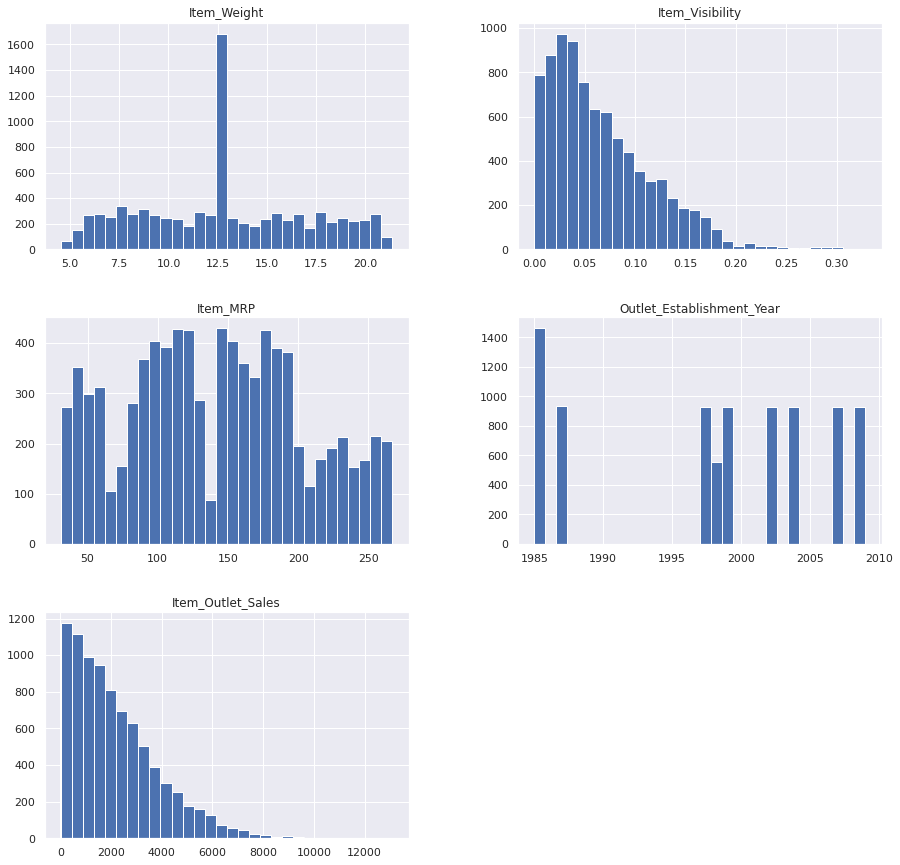

In [86]:
df_sales.hist(bins = 30, figsize = (15,15));

#Explanatory Data Visualization

##How often are customers buying these products?

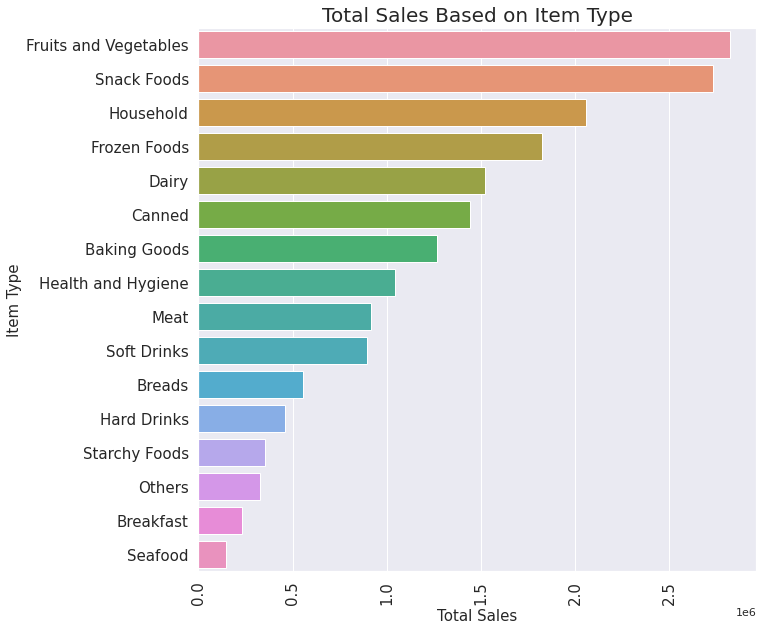

The data shows that fruits and vegetables and snack foods are leading in sales.
Customers seem to buy those two categories the most.


In [131]:
#bar code adapted from https://www.kaggle.com/questions-and-answers/55356

prod = df_sales.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(y=prod.index, x=prod)
#df_sales['Item_Type'].hist(edgecolor = "black", bins = 35, figsize = (10,10))
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Total Sales', fontsize = 15)
plt.ylabel('Item Type', fontsize = 15)
plt.title('Total Sales Based on Item Type', fontsize=20);

plt.show()
print('The data shows that fruits and vegetables and snack foods are leading in sales.')
print('Customers seem to buy those two categories the most.')

##What outlets do customers prefer?

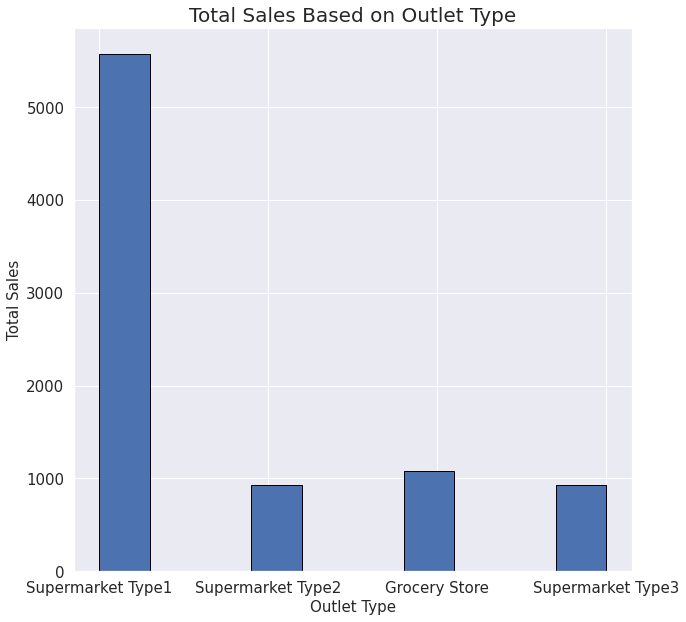

Customers seem to shop more at Supermarket Type 1
More clarity is needed to determine what each type means.


In [88]:
df_sales['Outlet_Type'].hist(edgecolor='black', figsize=(10,10))
plt.xlabel('Outlet Type', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Total Sales Based on Outlet Type', fontsize=20);

plt.show()
print('Customers seem to shop more at Supermarket Type 1')
print('More clarity is needed to determine what each type means.')

##Does outlet type affect sales?

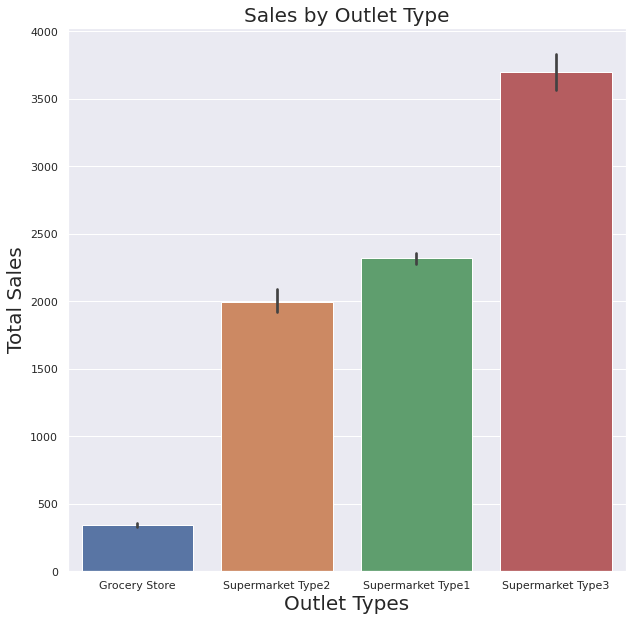

Graph shows that Supermarket Type 3 has the highest sales


In [108]:
sns.barplot(data=df_sales, x='Outlet_Type', y='Item_Outlet_Sales', orient= 'v', order=['Grocery Store','Supermarket Type2','Supermarket Type1','Supermarket Type3'])
plt.ylabel('Total Sales', fontsize=20)
plt.xlabel('Outlet Types', fontsize=20)
plt.title('Sales by Outlet Type', fontsize=20)

plt.show()
print('Graph shows that Supermarket Type 3 has the highest sales')

##Does Item visibility affect sales?

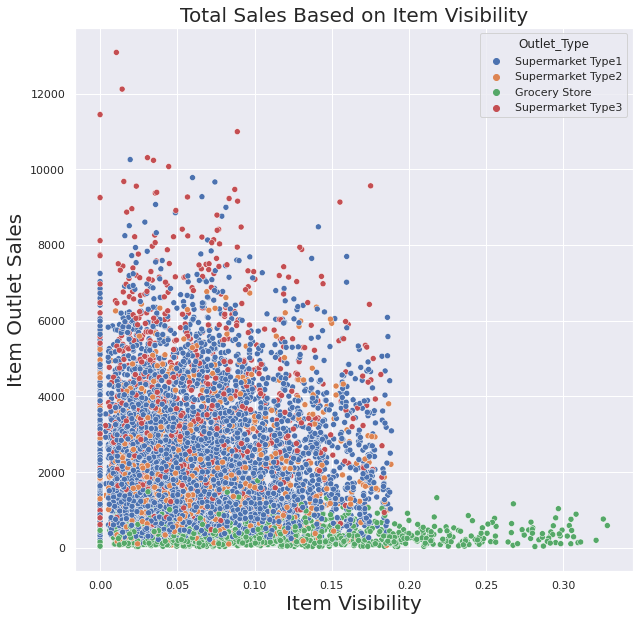

Since Grocery stores are small, it makes sense that visibility is so high. Customers see all
The graph is showing that more visible items (towards the front) sell less
This could be because more common items are placed towards the back of the store


In [156]:
sns.scatterplot(data = df_sales, x='Item_Visibility', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.ylabel('Item Outlet Sales', fontsize=20)
plt.xlabel('Item Visibility', fontsize=20)
plt.title('Total Sales Based on Item Visibility', fontsize=20)

plt.show();
print('Since Grocery stores are small, it makes sense that visibility is so high. Customers see all')
print('The graph is showing that more visible items (towards the front) sell less')
print('This could be because more common items are placed towards the back of the store')

##How is visibility different between outlet types?

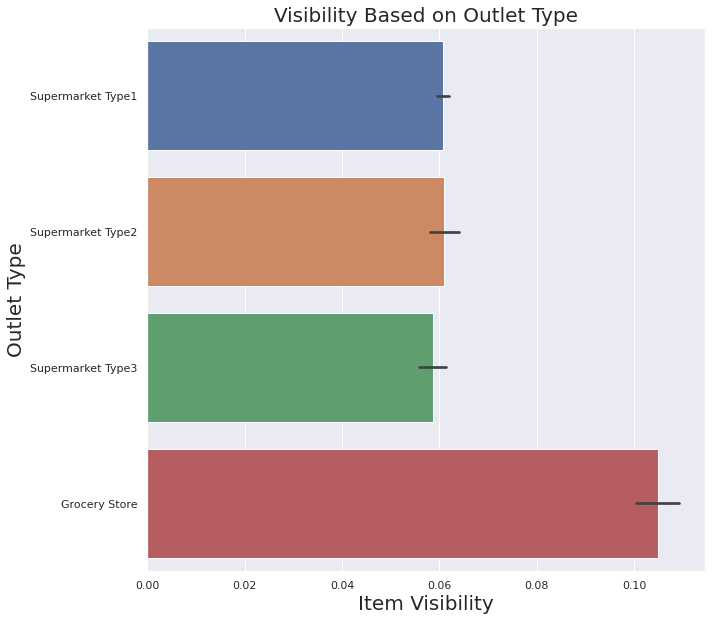

Grocery Stores have higher visibility because of their size.
Supermakets are bigger and therefore suffer on the visibility
Supermarkets strategize on what product to put in front of their stores to increase sales
Yet, since common items are higher in sales, they need less visibility and are placed in the back


In [157]:
sns.barplot(x="Item_Visibility", y="Outlet_Type", data=df_sales, order =['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'])
plt.ylabel('Outlet Type', fontsize=20)
plt.xlabel('Item Visibility', fontsize=20)
plt.title('Visibility Based on Outlet Type', fontsize=20)

plt.show()

print('Grocery Stores have higher visibility because of their size.')
print('Supermakets are bigger and therefore suffer on the visibility')
print('Supermarkets strategize on what product to put in front of their stores to increase sales')
print('Yet, since common items are higher in sales, they need less visibility and are placed in the back')

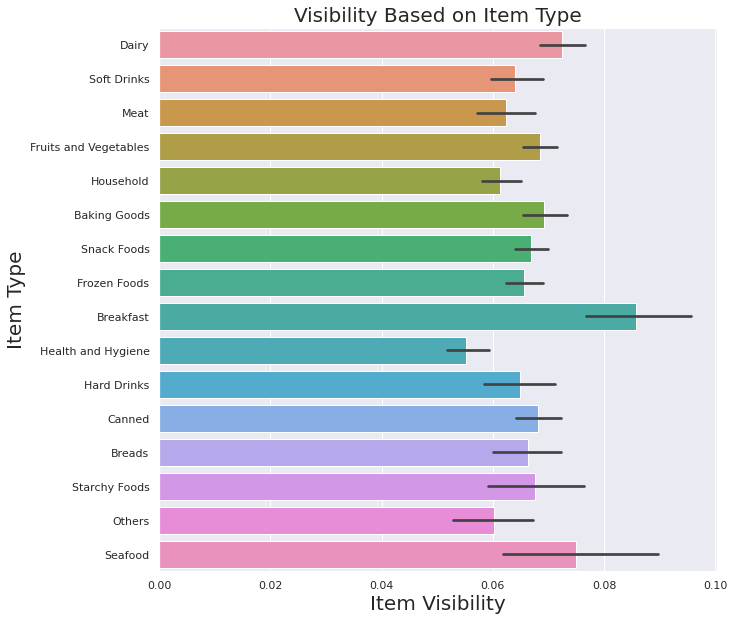

Following up with chart above, the common items do not have high visibility.


In [171]:
sns.barplot(x="Item_Visibility", y="Item_Type", data=df_sales)
plt.ylabel('Item Type', fontsize=20)
plt.xlabel('Item Visibility', fontsize=20)
plt.title('Visibility Based on Item Type', fontsize=20)

plt.show()
print('Following up with chart above, the common items do not have high visibility.')

##Does price have an impact on sales?

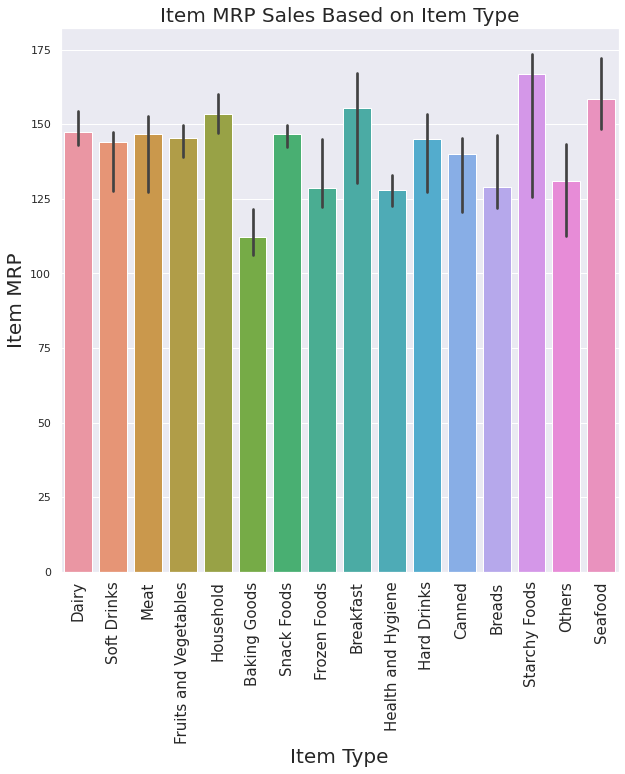

Starchy foods, seafood, breakfast, and household items have the highest MRP


In [48]:
sns.barplot(x='Item_Type', y='Item_MRP', data=df_sales, estimator = np.median)
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("Item Type", fontsize=20)
plt.ylabel("Item MRP" ,fontsize=20)
plt.title('Item MRP Sales Based on Item Type', fontsize=20);

plt.show()
print('Starchy foods, seafood, breakfast, and household items have the highest MRP')

##Does the outlet sales differ by supermarket type?

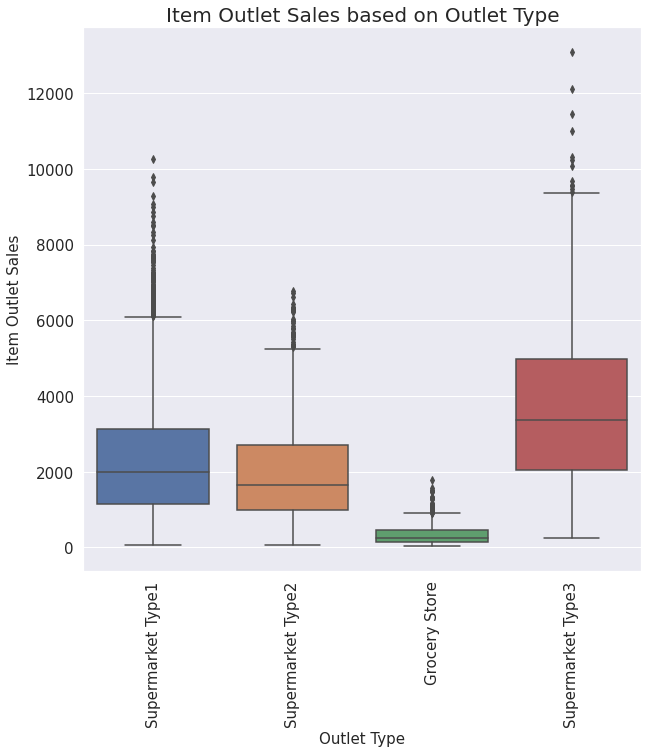

There are plenty of outliers in this data set from all outlet types
The means of supermaket type1 and type2 are fairly close to being the same.
The means of Grocery store is lower, but then again, this could be due to small data amount.
The means of supermarket type3 is much higher than the other data types.


In [49]:
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df_sales)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Outlet Type', fontsize=15)
plt.ylabel("Item Outlet Sales", fontsize=15)
plt.title('Item Outlet Sales based on Outlet Type', fontsize=20)

plt.show()
print('There are plenty of outliers in this data set from all outlet types')
print('The means of supermaket type1 and type2 are fairly close to being the same.') 
print('The means of Grocery store is lower, but then again, this could be due to small data amount.')
print('The means of supermarket type3 is much higher than the other data types.');


##Are there any correlations in the data?

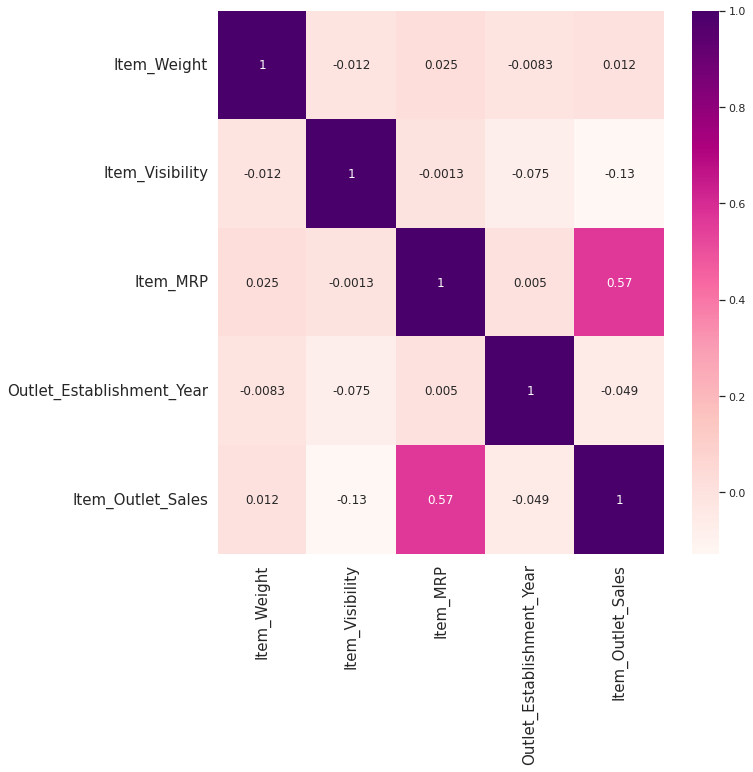

There is only a medium positive correlation between item_MRP and Item_Outlet_sales


In [24]:
#Check for any correlation
corr = df_sales.corr()
sns.heatmap(corr, cmap = "RdPu", annot=True)
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

plt.show()
print('There is only a medium positive correlation between item_MRP and Item_Outlet_sales')

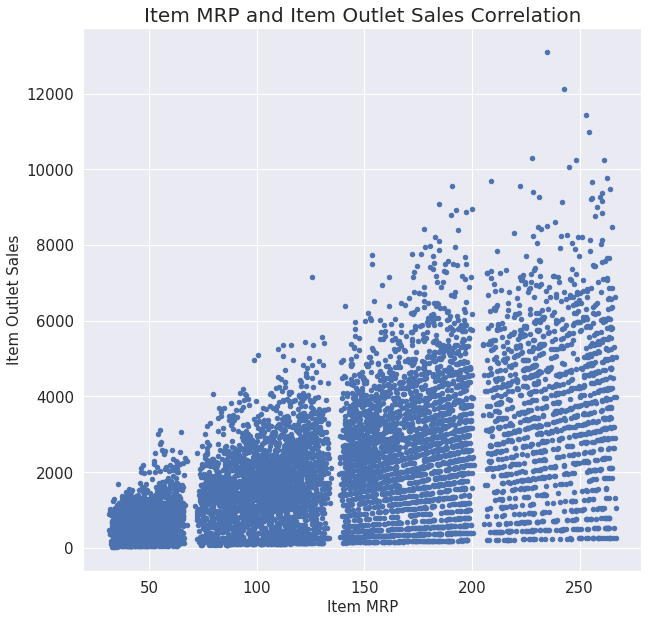

In this scatterplot, you can see the positive correlation between Item MRP and Item Outlet Sales


In [50]:
df_sales.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales', figsize=(10,10), color='b')
plt.title('Item MRP and Item Outlet Sales Correlation', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Item MRP',fontsize=15)
plt.ylabel('Item Outlet Sales', fontsize=15);

plt.show()
print('In this scatterplot, you can see the positive correlation between Item MRP and Item Outlet Sales')

#Machine Learning Predictions

##Help the retailer, by using machine learning, to make predicitons about future sales based on the data provided. 

##Import the necessary libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

##Reload data fresh with no changes for machine learning

In [ ]:
#import the data
filename = "/content/drive/MyDrive/Coding Dojo/01 Python Fundamentals/03 Week 3: Exploratory Viz/Assignments Exercise/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Explore the data

In [ ]:
#Explore the data
print(df.info(), '\n')
print(df.isna().sum(), '\n')
print(df.shape, '\n')
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

We have missing values in Item_weight, and Outlet_size

In [ ]:
#check for duplicates
df.duplicated().sum()

0

##Inspect columns for any inconsistensies

In [ ]:
for col in df:
  print(f'column = {col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

column = Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



column = Item_Weight
NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64



column = Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



column = Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



column = Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy            

Item_Fat_Content has inconsisten values and must be addressed

##Fixing inconsistent values

In [ ]:
#Check Item_Fat_Content value_counts
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Replacing inconsistent values
df.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}, inplace=True)

In [ ]:
#Check to ensure replace took place
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##Check for any outliers in the numerical data

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_visibility (The percentage of total display area of all products in a store allocated to the particular product) has an big range from 0 to 32.8%. 

##Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

In [ ]:
#Identify the target(X) and features (y)
#Item_Identifier is not needed for this data
X = df.drop(columns = ['Item_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

##Perform a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Create a pre-processing pipeline to prepare the dataset for Machine Learning

##Instantiate Column Selectors

In [ ]:
#selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

##Instatiate Transformers

In [ ]:
#imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

#scaler
scaler = StandardScaler()

#OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

##Instantiate Pipelines

For numeric pipeline - Impute the missing values with the mean value, then scale the data. 

In [ ]:
#numeric pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

For categorical pipeline - impute the missing data with the most frequent, then OneHotEncode the categorical data. 

In [ ]:
#categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

##Instantiate Column Transformer

In [ ]:
#Tuples for Column Transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#Column Transformer

preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31ff90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31fb50>)])

##Transformer Data

In [ ]:
#Fit ONLY the train data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31ff90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31fb50>)])

In [ ]:
#Transform train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

* See the column transformer steps
* Extract the featured names from onehot encode to use later when creating a dataframe
* Get the final col names (num + cat features)

In [ ]:
#Let's see the column transformer steps
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [ ]:
#Extract the feature names from one hot encode to use for dataframe later
cat_feature_names = preprocessor.named_transformers_['pipeline-2']\
                    .named_steps['onehotencoder']\
                    .get_feature_names_out(cat_selector(X_train))
cat_feature_names

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Typ

In [ ]:
#Get final col names (num + cat features)
final_cols = num_selector(X_train) + list(cat_feature_names)
final_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_T

##Inspect the result

In [ ]:
#check for missing values
#check that data is scaled and OneHotEncoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 42)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

##Return to a dataframe for easy viewing only

In [ ]:
#turn array back to a dataframe
X_train_df = pd.DataFrame(X_train_processed, columns = final_cols)
X_test_df = pd.DataFrame(X_test_processed, columns = final_cols)

In [ ]:
#display dataframe
display(X_train_df.head())
X_test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,3.310089e-01,-0.776646,-0.998816,-1.293807,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.179892e+00,0.100317,-1.585194,-0.102145,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.784469e-01,-0.482994,-1.595784,0.136187,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.213344e-16,-0.415440,0.506592,-1.532139,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-6.426567e-01,-1.047426,0.886725,0.732018,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#Check statistical data 

In [ ]:
display(X_train_df.describe().round(2))
X_test_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,...,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00,-0.00,0.65,0.35,0.07,0.03,0.01,0.08,...,0.11,0.61,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,...,0.31,0.49,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.98,-1.29,-1.77,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.81,-0.76,-0.76,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,-0.23,0.03,0.14,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,0.56,0.72,0.73,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.00,5.13,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,...,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.04,0.01,-0.06,-0.01,0.65,0.35,0.08,0.04,0.01,0.08,...,0.11,0.60,0.28,0.30,0.32,0.38,0.13,0.66,0.11,0.1
std,1.01,1.04,0.98,0.99,0.48,0.48,0.27,0.19,0.11,0.27,...,0.32,0.49,0.45,0.46,0.47,0.49,0.34,0.47,0.31,0.3
min,-1.97,-1.29,-1.75,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.89,-0.76,-0.78,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,0.00,-0.24,-0.15,0.14,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.73,0.56,0.64,0.73,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.0
max,2.00,4.79,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


#Final Tasks
The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales. 

Tasks include
1) Build a linear regression model to predict sales.

* Build a linear regression model.
* Evaluate the performance of your model based on r^2.
* Evaluate the performance of your model based on rmse.

2) Build a regression tree model to predict sales.

* Build a simple regression tree model.
* Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse. 

3) You now have tried 2 different models on your data set. You need to determine which model to implement.

* Overall, which model do you recommend?
* Justify your recommendation.


##Import the necessay libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

#Linear Regression

##Instantiate the dummy baseline model using the 'mean' strategy

In [ ]:
#Instantiate baseline model using 'mean' strategy
dummy = DummyRegressor(strategy='mean')
#place ColumnTransformer and baseline model into a pipeline
base_pipe = make_pipeline(preprocessor, dummy)
#fit pipe onto the training data
base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31ff90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31fb50>)])),
                ('dummyregressor', DummyRegressor())])

##Define a function that takes true and predicted values as arguements

In [ ]:
#function that takes true and predicted values as arguements
def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)
  print(f' MAE: {mae}, \n MSE: {mse}, \n RMSE: {rmse:}, \n R2: {r2}')

##predict the MAE, MSE, RMSE, and R2 on the baseline model for both the train and test data

In [ ]:
#Predict MAE, MSE, RMSE, and R2 on baseline model for Dummy
print('Train Evaluation')
eval_model(y_train, base_pipe.predict(X_train))
print('\nTest Evaluation')
eval_model(y_test, base_pipe.predict(X_test))

Train Evaluation
 MAE: 1360.2184410159132, 
 MSE: 2959455.7045265585, 
 RMSE: 1720.306863477141, 
 R2: 0.0

Test Evaluation
 MAE: 1326.121044678208, 
 MSE: 2772144.4627103633, 
 RMSE: 1664.9758144520788, 
 R2: -0.004772483978719766


##Instantiate the linear regression model

In [ ]:
##instatiate a linear regression model
reg = LinearRegression()

#place ColumnTransformer and Linear Regression Model into a pipeline
lin_reg = make_pipeline(preprocessor, reg)

#fit pipeline on the training data
lin_reg.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31ff90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31fb50>)])),
                ('linearregression', LinearRegression())])

##Predict the MAE, MSE, RMSE, and R2 of the linear regression model on both train and test data

In [ ]:
#Predict MAE, MSE, RMSE, and R2
print('Train Evaluation')
eval_model(y_train, lin_reg.predict(X_train))
print('\nTest Evaluation')
eval_model(y_test, lin_reg.predict(X_test))

Train Evaluation
 MAE: 847.1287326345432, 
 MSE: 1297558.3346717297, 
 RMSE: 1139.1041807805507, 
 R2: 0.5615550749122269

Test Evaluation
 MAE: 804.1187497653683, 
 MSE: 1194345.9381363837, 
 RMSE: 1092.8613535743607, 
 R2: 0.5671055563179823


#Decision Tree Regressor

##Instantiate the model

In [ ]:
#instantiate the model
dec_tree = DecisionTreeRegressor(random_state=42)

##Fit the model into training data

In [ ]:
#place ColumnTransformer and Regression Tree Model into a pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

#fit pipeline on training data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31ff90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31fb50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

##Predict the MAE, MSE, RMSE, and R2 of the Decision Tree Regressor model on both train and test data

In [ ]:
#Predict MAE, MSE, RMSE, and R2
print('Train Evaluation')
eval_model(y_train, dec_tree_pipe.predict(X_train))
print('\nTest Evaluation')
eval_model(y_test, dec_tree_pipe.predict(X_test))

Train Evaluation
 MAE: 1.6007220580327663e-16, 
 MSE: 3.0330171474830394e-29, 
 RMSE: 5.50728349323243e-15, 
 R2: 1.0

Test Evaluation
 MAE: 1044.9982510558423, 
 MSE: 2251075.1648917384, 
 RMSE: 1500.3583454934153, 
 R2: 0.18409072273251326


Our model is overfit. We can try different values for max depth to determine optimal value based on highest r2

In [ ]:
##Determine the depth of the default tree and the n_leaves
print(dec_tree.get_depth())
print(dec_tree.get_n_leaves())

40
6271


##Try different values for max_depth loop

In [ ]:
#list the values for max-depth
max_depth_range = list(range(2, 36))
#list to store the score for each value of max_depth
r2=[]
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
  dec_tree_pipe.fit(X_train, y_train)
  score = dec_tree_pipe.score(X_test, y_test)
  r2.append(score)

##Visualize which max_depth leads to the highest r2 score

Text(0, 0.5, 'R2')

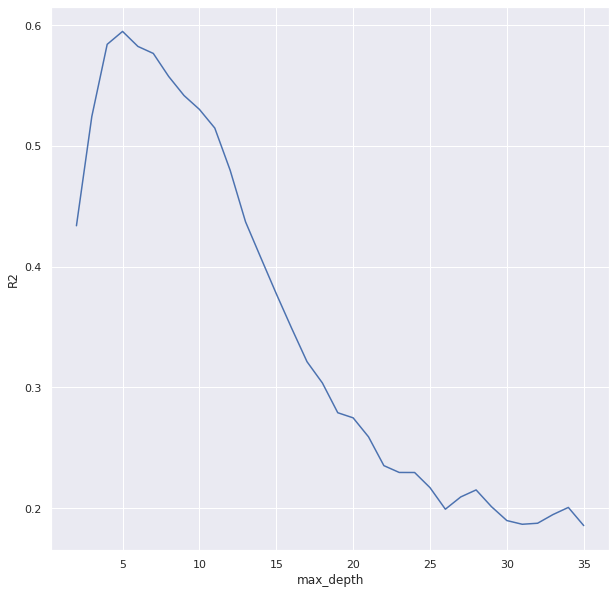

In [ ]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')

From the linear above, it looks like 5 will give the best score

In [ ]:
#Decision tree with max_depth of 5
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state=42)
dec_tree_5_pipe = make_pipeline(preprocessor, dec_tree_5)
dec_tree_5_pipe.fit(X_train, y_train)
train_5_score = dec_tree_5_pipe.score(X_train, y_train)
test_5_score = dec_tree_5_pipe.score(X_test, y_test)

print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


##Predict the MAE, MSE, RMSE, and R2 of the Decision Tree Regressor model on both train and test data

In [ ]:
#Predict MAE, MSE, RMSE, and R2
print('Train Evaluation')
eval_model(y_train, dec_tree_5_pipe.predict(X_train))
print('\nTest Evaluation')
eval_model(y_test, dec_tree_5_pipe.predict(X_test))

Train Evaluation
 MAE: 762.6101695559577, 
 MSE: 1172122.7729098853, 
 RMSE: 1082.6461900869947, 
 R2: 0.6039397477322956

Test Evaluation
 MAE: 738.3173097797824, 
 MSE: 1118185.973077762, 
 RMSE: 1057.4431299496734, 
 R2: 0.5947099753159972


#Bagged Tree Regressor

##Make instance of model

In [ ]:
bagreg = BaggingRegressor(random_state=42)

##Fit model into training data

In [ ]:
#place ColumnTransformer and Regression Tree Model into a pipeline
bagreg_pipe = make_pipeline(preprocessor, bagreg)

#fit pipeline on training data
bagreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31ff90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31fb50>)])),
                ('baggingregressor', BaggingRegressor(random_state=42))])

##Predict the MAE, MSE, RMSE, and R2 of the Bagging Regressor model on both train and test data

In [ ]:
#Predict MAE, MSE, RMSE, and R2
print('Train Evaluation')
eval_model(y_train, bagreg_pipe.predict(X_train))
print('\nTest Evaluation')
eval_model(y_test, bagreg_pipe.predict(X_test))

Train Evaluation
 MAE: 319.5451061138924, 
 MSE: 242224.5048546436, 
 RMSE: 492.1630876596127, 
 R2: 0.9181523465669192

Test Evaluation
 MAE: 780.5926369497888, 
 MSE: 1281046.6162421494, 
 RMSE: 1131.8332987865967, 
 R2: 0.5356806227061904


##Tune n_estimators

In [ ]:
#list of values to try for n_estimator
n_estimator_range = list(range(10,200))
#list to store the score of each n_estimator
r2=[]
for estimate in n_estimator_range:
  bagreg = BaggingRegressor(n_estimators = estimate, random_state=42)
  bagreg_pipe = make_pipeline(preprocessor, bagreg)
  bagreg_pipe.fit(X_train, y_train)
  score = bagreg_pipe.score(X_test, y_test)
  r2.append(score)

##Visualize n_estimators vs r2

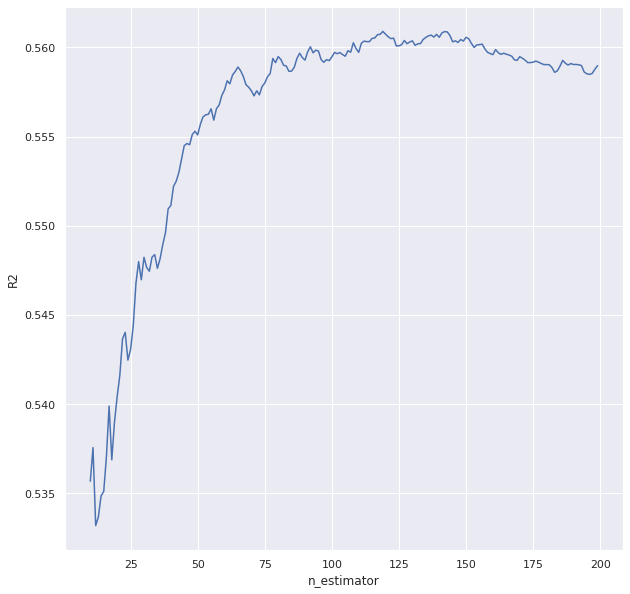

In [ ]:
#Visualize which n_estimator leads to highest r2 score
plt.plot(n_estimator_range, r2)
plt.xlabel('n_estimator')
plt.ylabel('R2');

Looking at the graph above we can see that changing the n_estimator number will not produce better r2 numbers. 

#Random Forest Tree Regressor

##make instance of the model

In [ ]:
#make an instance of the model
rf = RandomForestRegressor(random_state=42)

##Fit model into training data

In [ ]:
#place ColumnTransformer and Regression Tree Model into a pipeline
rf_pipe = make_pipeline(preprocessor, rf)

#fit pipeline on training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31ff90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f989d31fb50>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

##Predict the MAE, MSE, RMSE, and R2 of the Random Forest Regressor model on both train and test data

In [ ]:
#Predict MAE, MSE, RMSE, and R2
print('Train Evaluation')
eval_model(y_train, rf_pipe.predict(X_train))
print('\nTest Evaluation')
eval_model(y_test, rf_pipe.predict(X_test))

Train Evaluation
 MAE: 296.6059399818523, 
 MSE: 182863.81138246632, 
 RMSE: 427.625784281615, 
 R2: 0.9382103232351909

Test Evaluation
 MAE: 766.0678240919756, 
 MSE: 1214585.1279857568, 
 RMSE: 1102.0821784176337, 
 R2: 0.5597697982677727


##Tune n_estimators

In [ ]:
#list of values to try for n_estimator
n_estimator_range = list(range(10,200))
#list to store the score of each n_estimator
r2=[]
for estimate in n_estimator_range:
  rf = RandomForestRegressor(n_estimators = estimate, random_state=42)
  rf_pipe = make_pipeline(preprocessor, rf)
  rf_pipe.fit(X_train, y_train)
  score = rf_pipe.score(X_test, y_test)
  r2.append(score)

##Visualize the r2 vs n_estimators

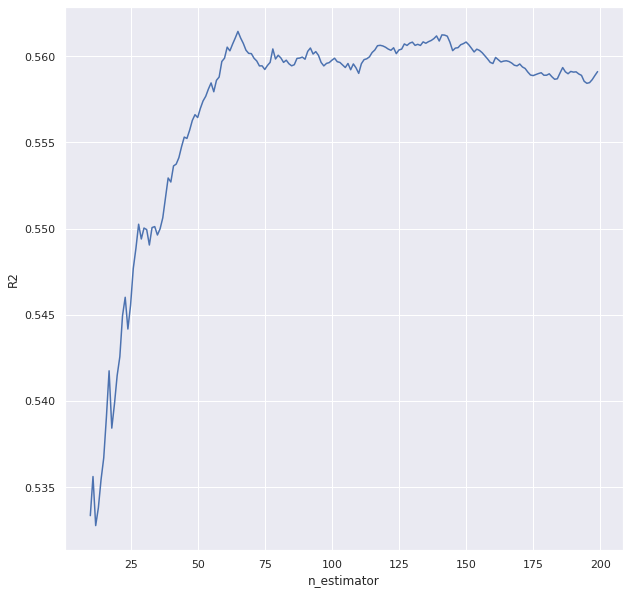

In [ ]:
#Visualize which n_estimator leads to highest r2 score
plt.plot(n_estimator_range, r2)
plt.xlabel('n_estimator')
plt.ylabel('R2');

##Tune max_depth

In [ ]:
#list the values for max-depth
max_depth_range = list(range(2, 36))
#list to store the score for each value of max_depth
r2=[]
for depth in max_depth_range:
  rf = RandomForestRegressor(max_depth = depth, random_state=42)
  rf_pipe = make_pipeline(preprocessor, rf)
  rf_pipe.fit(X_train, y_train)
  score = rf_pipe.score(X_test, y_test)
  r2.append(score)

##Visualize the r2 vs max_depth

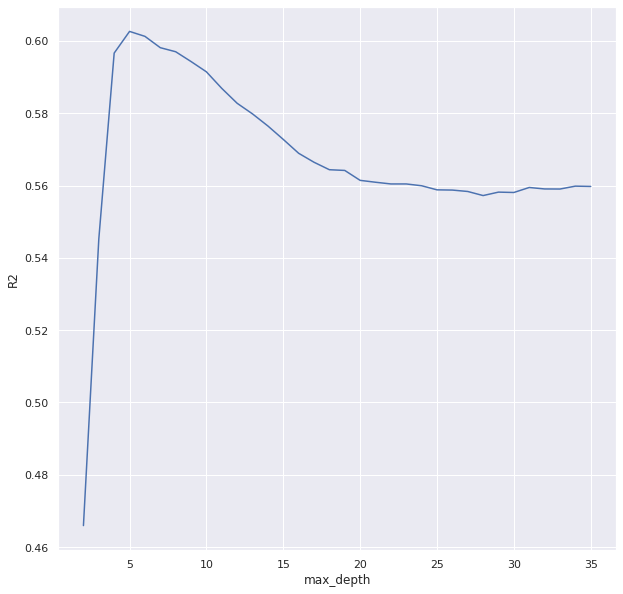

In [ ]:
#visualize r2 vs max_depth
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

Based on the graph above it seems max-depth of 5 will give a better r2 value.

In [ ]:
#RandomForestRegressor with max_depth of 5
rf_5 = RandomForestRegressor(max_depth = 5, random_state=42)
rf_5_pipe = make_pipeline(preprocessor, rf_5)
rf_5_pipe.fit(X_train, y_train)
train_5_score = rf_5_pipe.score(X_train, y_train)
test_5_score = rf_5_pipe.score(X_test, y_test)

print(train_5_score)
print(test_5_score)

0.6105350056829436
0.6026230362553153


In [ ]:
#Predict MAE, MSE, RMSE, and R2
print('Train Evaluation')
eval_model(y_train, rf_5_pipe.predict(X_train))
print('\nTest Evaluation')
eval_model(y_test, rf_5_pipe.predict(X_test))

Train Evaluation
 MAE: 755.3755947641303, 
 MSE: 1152604.3991450162, 
 RMSE: 1073.5941501074865, 
 R2: 0.6105350056829436

Test Evaluation
 MAE: 728.3529687785237, 
 MSE: 1096354.0176691534, 
 RMSE: 1047.0692516109684, 
 R2: 0.6026230362553153


##Determine which model to implement

##Compare all MAE, MSE, RMSE, and R2 of each regression. 

In [ ]:
#Predict MAE, MSE, RMSE, and R2
print('Linear Regression')
print('\n -Train Evaluation')
eval_model(y_train, lin_reg.predict(X_train))
print('\n -Test Evaluation')
eval_model(y_test, lin_reg.predict(X_test))

print('\nDecision Tree Regressor')
print('\n -Train Evaluation')
eval_model(y_train, dec_tree_5_pipe.predict(X_train))
print('\n -Test Evaluation')
eval_model(y_test, dec_tree_5_pipe.predict(X_test))

print('\nBagging Regressor')
print('\n -Train Evaluation')
eval_model(y_train, bagreg_pipe.predict(X_train))
print('\n -Test Evaluation')
eval_model(y_test, bagreg_pipe.predict(X_test))

print('\nRandom Forest Regressor')
print('\n -Train Evaluation')
eval_model(y_train, rf_5_pipe.predict(X_train))
print('\n -Test Evaluation')
eval_model(y_test, rf_5_pipe.predict(X_test))

Linear Regression

 -Train Evaluation
 MAE: 847.1287326345432, 
 MSE: 1297558.3346717297, 
 RMSE: 1139.1041807805507, 
 R2: 0.5615550749122269

 -Test Evaluation
 MAE: 804.1187497653683, 
 MSE: 1194345.9381363837, 
 RMSE: 1092.8613535743607, 
 R2: 0.5671055563179823

Decision Tree Regressor

 -Train Evaluation
 MAE: 762.6101695559577, 
 MSE: 1172122.7729098853, 
 RMSE: 1082.6461900869947, 
 R2: 0.6039397477322956

 -Test Evaluation
 MAE: 738.3173097797824, 
 MSE: 1118185.973077762, 
 RMSE: 1057.4431299496734, 
 R2: 0.5947099753159972

Bagging Regressor

 -Train Evaluation
 MAE: 295.45223600637746, 
 MSE: 179287.23546305078, 
 RMSE: 423.4232344393146, 
 R2: 0.9394188481385862

 -Test Evaluation
 MAE: 768.4163769179072, 
 MSE: 1216778.51686491, 
 RMSE: 1103.0768408705308, 
 R2: 0.5589747975663002

Random Forest Regressor

 -Train Evaluation
 MAE: 755.3755947641303, 
 MSE: 1152604.3991450162, 
 RMSE: 1073.5941501074865, 
 R2: 0.6105350056829436

 -Test Evaluation
 MAE: 728.3529687785237, 

I would implement the Random Forest Regressor model, as it provides less error and a higher R2 score than the other regressions. 